## 1.1 IMPORTING LIBRARIES

In [1]:

import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#model building
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

## 1.2 Loading the DATASETS

In [2]:
df=pd.read_csv("ipl_match.csv")
df1=pd.read_csv("delivery.csv")

In [3]:
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [4]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [5]:
df.shape

(950, 20)

In [6]:
df.dtypes

ID                   int64
City                object
Date                object
Season              object
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
SuperOver           object
WinningTeam         object
WonBy               object
Margin             float64
method              object
Player_of_Match     object
Team1Players        object
Team2Players        object
Umpire1             object
Umpire2             object
dtype: object

In [7]:
df1

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [8]:
df1.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [9]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [10]:
df1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [11]:
len(df)

950

In [12]:
len(df1)

225954

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

# EDA

In [15]:
df['Season'].value_counts()

2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: Season, dtype: int64

In [16]:
df['Season']=df['Season'].replace('2020/21','2020')
df['Season']=df['Season'].replace('2009/10','2010')
df['Season']=df['Season'].replace('2007/08','2008')


In [17]:
a= df['Season'].value_counts().sort_index()
a

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
Name: Season, dtype: int64

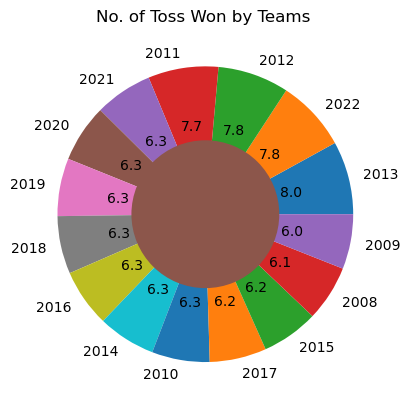

In [18]:
plt.pie(list(df['Season'].value_counts()),labels=list(df['Season'].value_counts().keys())
        ,autopct="%0.1f",radius=1)
plt.pie([1],radius=0.5)
plt.title('No. of Toss Won by Teams ')
plt.show()

In [19]:
df['Venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                              

In [20]:
df['Venue']=df['Venue'].replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium') 
df['Venue']=df['Venue'].replace('Brabourne Stadium, Mumbai','Brabourne Stadium') 
df['Venue']=df['Venue'].replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy') 
df['Venue']=df['Venue'].replace('Eden Gardens, Kolkata','Eden Gardens') 
df['Venue']=df['Venue'].replace('Feroz Shah Kotla','Arun Jaitley Stadium') 
df['Venue']=df['Venue'].replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')
df['Venue']=df['Venue'].replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium') 
df['Venue']=df['Venue'].replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium') 
df['Venue']=df['Venue'].replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium') 
df['Venue']=df['Venue'].replace('Punjab Cricket Association IS Bindra Stadium','Punjab Cricket Association Stadium')
df['Venue']=df['Venue'].replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium') 
df['Venue']=df['Venue'].replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium') 
df['Venue']=df['Venue'].replace('Wankhede Stadium, Mumbai','Wankhede Stadium') 

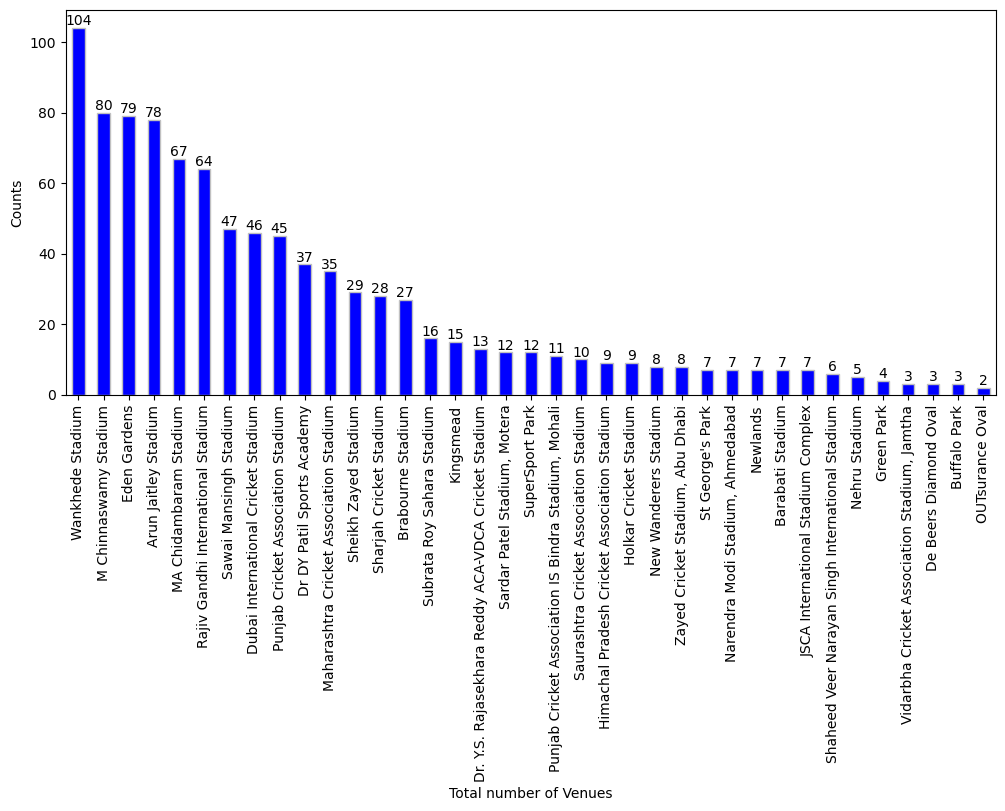

In [21]:
V=df['Venue'].value_counts()
V.plot(figsize=(12,5),kind='bar',xlabel='Total number of Venues',ylabel='Counts',color='blue',edgecolor='silver')
for i,j in enumerate(V.values):
    plt.text(i,j ,j, ha='center',va='bottom')
plt.show()

In [22]:
df['TossWinner'].value_counts()

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: TossWinner, dtype: int64

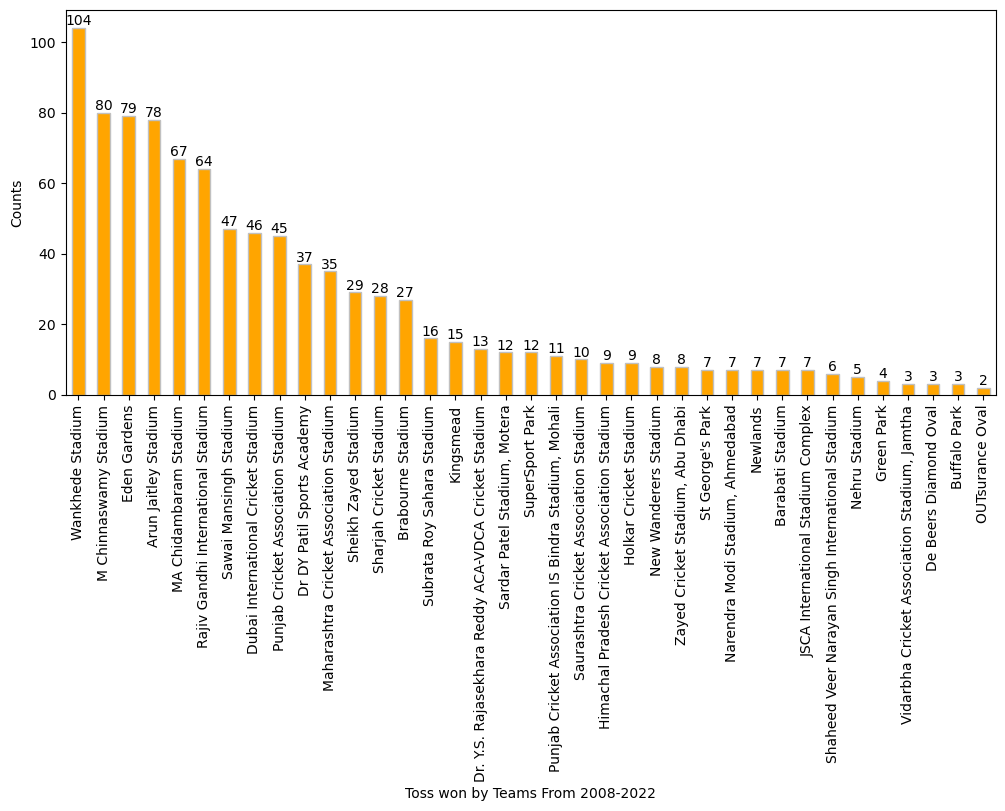

In [23]:
TW=df['TossWinner'].value_counts()
V.plot(figsize=(12,5),kind='bar',xlabel='Toss won by Teams From 2008-2022',ylabel='Counts',color='orange',edgecolor='silver')
for i,j in enumerate(V.values):
    plt.text(i,j ,j, ha='center',va='bottom')
plt.show()

In [24]:
df['Player_of_Match'].value_counts()[0:10]

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

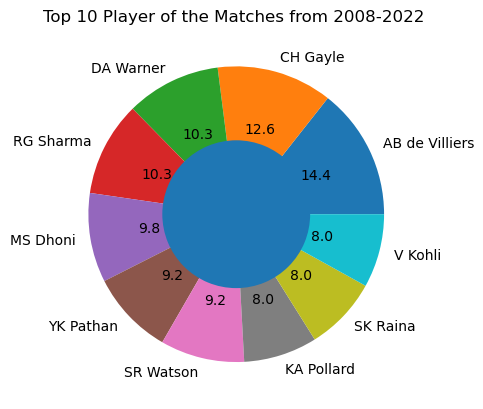

In [25]:
plt.pie(list(df['Player_of_Match'].value_counts()[0:10]),labels=list(df['Player_of_Match'].value_counts()[0:10].keys())
        ,autopct="%0.1f",radius=1)
plt.pie([1],radius=0.5)
plt.title('Top 10 Player of the Matches from 2008-2022 ')
plt.show()

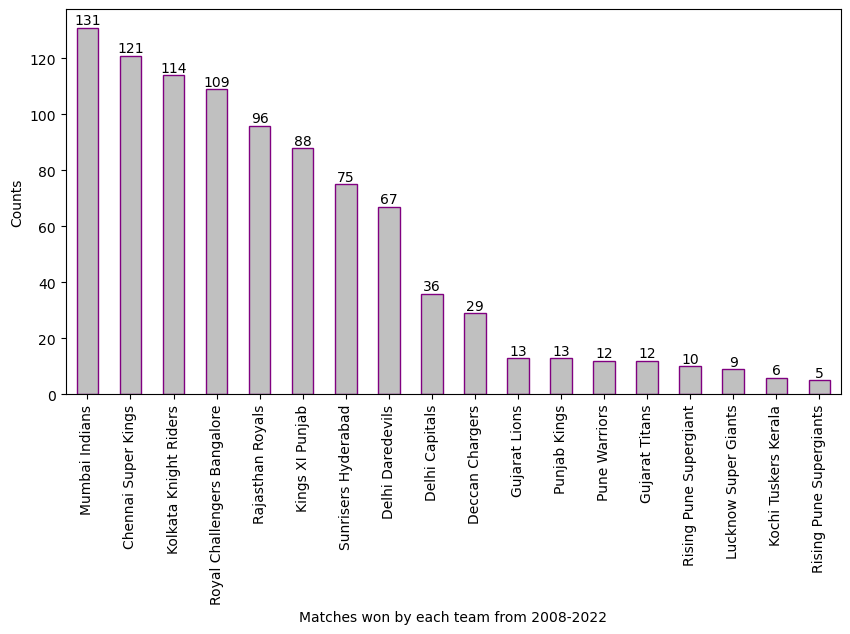

In [26]:
win=df['WinningTeam'].value_counts()
win.plot(figsize=(10,5),kind='bar',xlabel='Matches won by each team from 2008-2022',ylabel='Counts',color='silver',edgecolor='purple')
for i,j in enumerate(win.values):
    plt.text(i,j ,j, ha='center',va='bottom')
plt.show()

In [27]:
df['SuperOver'].value_counts()

N    932
Y     14
Name: SuperOver, dtype: int64

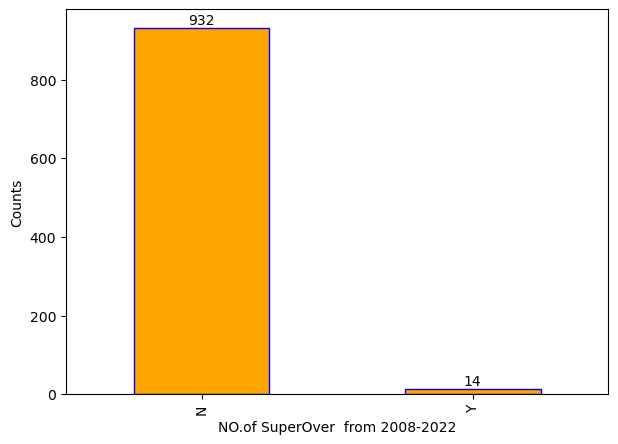

In [28]:
S_O=df['SuperOver'].value_counts()
S_O.plot(figsize=(7,5),kind='bar',xlabel='NO.of SuperOver  from 2008-2022',ylabel='Counts',color='orange',edgecolor='blue')
for i,j in enumerate(S_O.values):
    plt.text(i,j ,j, ha='center',va='bottom')
plt.show()

In [29]:
df['City'].value_counts()

Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Bengaluru          15
Durban             15
Visakhapatnam      13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: City, dtype: int64

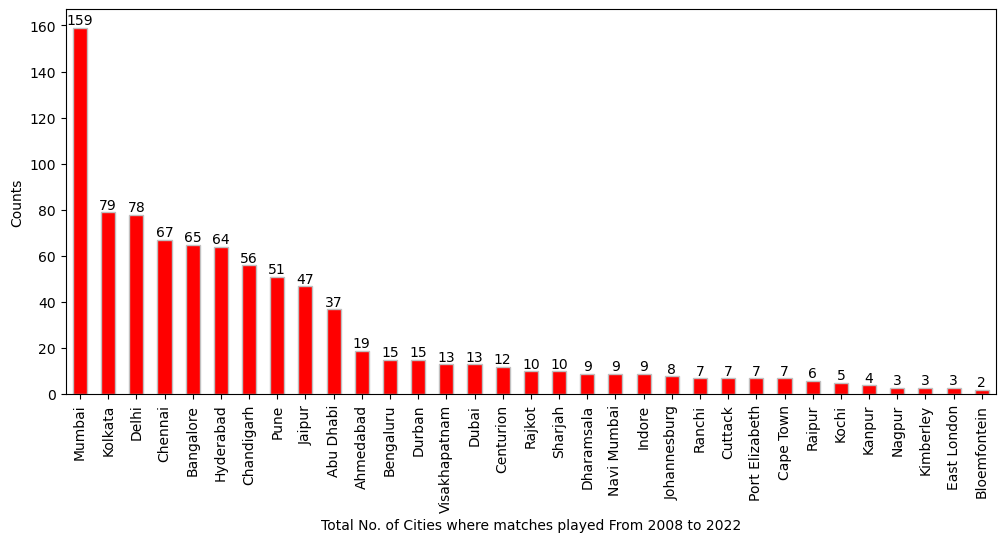

In [30]:
c=df['City'].value_counts()
c.plot(figsize=(12,5),kind='bar',xlabel='Total No. of Cities where matches played From 2008 to 2022',ylabel='Counts',color='red',edgecolor='silver')
for i,j in enumerate(c.values):
    plt.text(i,j ,j, ha='center',va='bottom')
plt.show()

# checking null values

In [31]:
df.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [32]:
df1.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

# Data processing

### most wins in ipl

In [33]:
winners=pd.DataFrame({"WinningTeam": df['WinningTeam']})
count_winner=winners.value_counts()
print(count_winner)

WinningTeam                
Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Gujarat Titans                  12
Pune Warriors                   12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


In [34]:
total_score_df=df1.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_score_df

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [35]:
total_score_df=total_score_df[total_score_df['innings']==1]
total_score_df['total_run']=total_score_df['total_run'].apply(lambda x:x+1)
total_score_df

C:\Users\anshika\AppData\Local\Temp\ipykernel_10440\1322282672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_score_df['total_run']=total_score_df['total_run'].apply(lambda x:x+1)


,ID,innings,total_run
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1918,1304116,1,158
1920,1312197,1,189
1922,1312198,1,208
1924,1312199,1,158


In [36]:
total_score_df=total_score_df[total_score_df['innings']==1]

In [37]:
total_score_df

,ID,innings,total_run
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1918,1304116,1,158
1920,1312197,1,189
1922,1312198,1,208
1924,1312199,1,158


# Merging two data frames

In [38]:
match=df.merge(total_score_df[['ID','total_run']],
              left_on='ID',right_on='ID')

In [39]:
match

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,111
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,166
947,335984,Delhi,2008-04-19,2008,3,Delhi Daredevils,Rajasthan Royals,Arun Jaitley Stadium,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,130
948,335983,Chandigarh,2008-04-19,2008,2,Kings XI Punjab,Chennai Super Kings,Punjab Cricket Association Stadium,Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,241


# Renaming teams

In [40]:
match['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [41]:
teams = ['Sunrisers Hyderabad',
       'Mumbai Indians',
       'Royal Challengers Bangalore',
       'Chennai Super Kings',
       'Gujarat Titans',
       'Delhi Capitals',
       'Rajasthan Royals',
       'Lucknow Super Giants',
       'Kolkata Knight Riders',
       'Kings XI Punjab'
       ]

In [42]:
match['Team1']=match['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match['Team2']=match['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match['Team1']=match['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match['Team2']=match['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match['Team1']=match['Team1'].str.replace('Punjab Kings','Kings XI Punjab')
match['Team2']=match['Team2'].str.replace('Punjab Kings','Kings XI Punjab')

match['Team1']=match['Team1'].str.replace('Gujarat Lions','Gujarat Titans')
match['Team2']=match['Team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [43]:
match=match[match['Team1'].isin(teams)]
match=match[match['Team2'].isin(teams)]

In [44]:
match['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Mumbai Indians'], dtype=object)

In [45]:
match['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Kings XI Punjab', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings'], dtype=object)

In [46]:
match.shape

(861, 21)

In [47]:
match=match[['ID','City','WinningTeam','total_run','Team1','Team2']]

In [48]:
delivery_df=match.merge(df1,on='ID')
delivery_df.head(5)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [49]:
delivery_df=delivery_df[delivery_df['innings']==2]

In [50]:
delivery_df.shape

(98901, 22)

In [51]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205076,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
205077,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
205078,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
205079,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [52]:
delivery_df.groupby('ID').cumsum()['total_run_y']

120        0
121        0
122        1
123        1
124        1
          ..
205076    80
205077    81
205078    81
205079    82
205080    82
Name: total_run_y, Length: 98901, dtype: int64

In [53]:
delivery_df['current_score']=delivery_df.groupby('ID').cumsum()['total_run_y']

In [54]:
delivery_df.head(10)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
125,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,6,Shubman Gill,...,4,0,4,0,0,NaN,NaN,NaN,Gujarat Titans,5
126,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,5
127,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,2,WP Saha,...,4,0,4,0,0,NaN,NaN,NaN,Gujarat Titans,9
128,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,3,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,9
129,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,4,WP Saha,...,0,0,0,0,1,WP Saha,bowled,NaN,Gujarat Titans,9


In [55]:
delivery_df['runs_left']=delivery_df['total_run_x']-delivery_df['current_score']

In [56]:
delivery_df.head(10)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
125,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,6,Shubman Gill,...,0,4,0,0,NaN,NaN,NaN,Gujarat Titans,5,126
126,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,5,126
127,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,2,WP Saha,...,0,4,0,0,NaN,NaN,NaN,Gujarat Titans,9,122
128,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,3,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,9,122
129,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,4,WP Saha,...,0,0,0,1,WP Saha,bowled,NaN,Gujarat Titans,9,122


# Creating necessary columns

In [57]:
delivery_df['ball_left']=120-(delivery_df['overs']*6+delivery_df['ballnumber'])
delivery_df[['overs','ballnumber','ball_left']].head(10)

,overs,ballnumber,ball_left
120,0,1,119
121,0,2,118
122,0,3,117
123,0,4,116
124,0,5,115
125,0,6,114
126,1,1,113
127,1,2,112
128,1,3,111
129,1,4,110


In [58]:
delivery_df.head(10)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,ball_left
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115
125,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,6,Shubman Gill,...,4,0,0,NaN,NaN,NaN,Gujarat Titans,5,126,114
126,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,1,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,5,126,113
127,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,2,WP Saha,...,4,0,0,NaN,NaN,NaN,Gujarat Titans,9,122,112
128,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,3,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,9,122,111
129,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,4,WP Saha,...,0,0,1,WP Saha,bowled,NaN,Gujarat Titans,9,122,110


In [59]:
#delivery_df['BowlingTeam']=df['Team2'].where(df['Team1']==df['WinningTeam'],df['Team1'])

In [60]:
delivery_df['BowlingTeam']=delivery_df.apply(lambda row:row['Team2']  if row['Team1']==row['WinningTeam'] else row['Team1'], axis=1)

In [61]:
delivery_df.tail(10)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,ball_left,BowlingTeam
205071,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,13,6,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,77,146,36,Royal Challengers Bangalore
205072,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,1,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,78,145,35,Royal Challengers Bangalore
205073,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,2,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,78,145,34,Royal Challengers Bangalore
205074,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,3,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,78,145,33,Royal Challengers Bangalore
205075,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,4,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,79,144,32,Royal Challengers Bangalore
205076,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143,31,Royal Challengers Bangalore
205077,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,30,Royal Challengers Bangalore
205078,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,29,Royal Challengers Bangalore
205079,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141,29,Royal Challengers Bangalore
205080,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,2,SB Joshi,...,0,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,82,141,28,Royal Challengers Bangalore


for index, row in df.iterrows():
    if pd.isna(row['BowlingTeam']):
        if row['Team1']==row['WinningTeam']:
            df.at[index,'BowlingTeam']=row['Team1']
        else:
            df.at['index','BowlingTeam']=row['Team2']

df['BowlingTeam'].fillna(df['Team1'],inplace=True)
df['BowlingTeam'].fillna(df['Team2'],inplace=True)

In [62]:
delivery_df.head()

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,ball_left,BowlingTeam
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,Rajasthan Royals
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,Rajasthan Royals
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,Rajasthan Royals
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,Rajasthan Royals
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,Rajasthan Royals


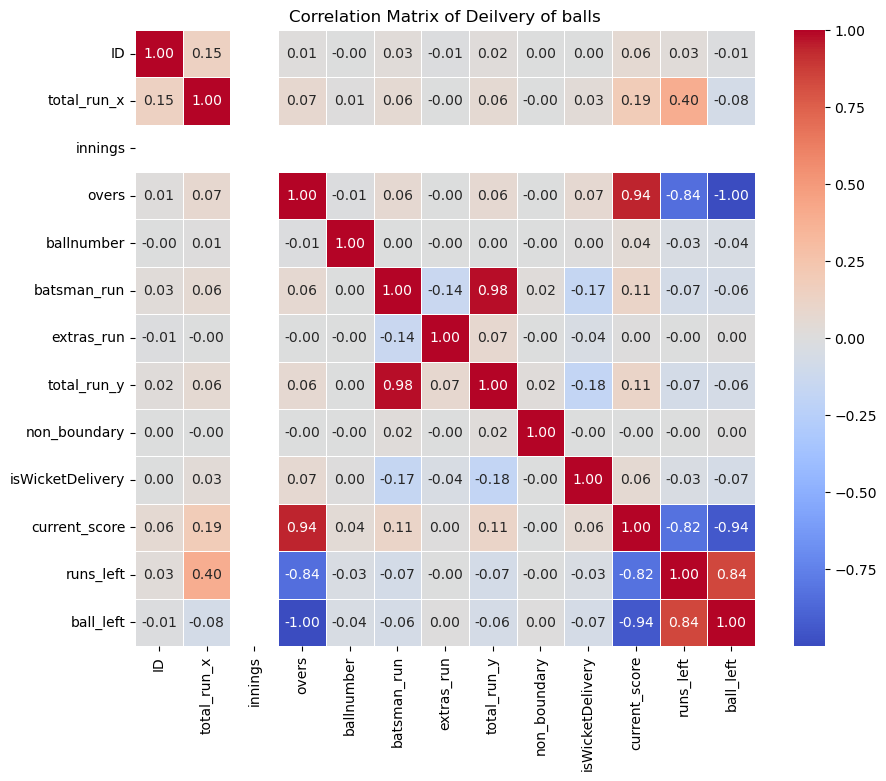

In [63]:
# Calculate the correlation matrix
correlation_matrix = delivery_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Deilvery of balls')
plt.show()

<!-- Handling null values -->

# Handling null values

In [64]:
delivery_df['player_out']

120            NaN
121            NaN
122            NaN
123            NaN
124            NaN
            ...   
205076         NaN
205077         NaN
205078         NaN
205079         NaN
205080    SB Joshi
Name: player_out, Length: 98901, dtype: object

In [65]:
delivery_df['player_out']=delivery_df['player_out'].fillna('0')
delivery_df['player_out']=delivery_df['player_out'].apply(lambda x:x if x=='0' else '1')
delivery_df['player_out']=delivery_df['player_out'].astype('int')


In [66]:
delivery_df['player_out'].unique()

array([0, 1])

In [67]:
wicket=delivery_df.groupby('ID').cumsum()['player_out'].values
delivery_df['wicket_left']=10-wicket

In [68]:
delivery_df.head(10)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,ball_left,BowlingTeam,wicket_left
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,0,131,119,Rajasthan Royals,10
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,0,131,118,Rajasthan Royals,10
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,1,130,117,Rajasthan Royals,10
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,1,130,116,Rajasthan Royals,10
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,1,130,115,Rajasthan Royals,10
125,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,6,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,5,126,114,Rajasthan Royals,10
126,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,1,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,5,126,113,Rajasthan Royals,10
127,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,2,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,9,122,112,Rajasthan Royals,10
128,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,3,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,9,122,111,Rajasthan Royals,10
129,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,1,4,WP Saha,...,1,1,bowled,NaN,Gujarat Titans,9,122,110,Rajasthan Royals,9


calculate current runrate and required runrate

In [69]:
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['ball_left'])
delivery_df['rrr']=(delivery_df['runs_left']*6)/(delivery_df['ball_left'])
delivery_df[['crr','rrr']].head(10)

,crr,rrr
120,0.000000,6.605042
121,0.000000,6.661017
122,2.000000,6.666667
123,1.500000,6.724138
124,1.200000,6.782609
125,5.000000,6.631579
126,4.285714,6.690265
127,6.750000,6.535714
128,6.000000,6.594595
129,5.400000,6.654545


In [70]:
 def result(row):
        return 1 if row['BattingTeam']==row['WinningTeam'] else 0

In [71]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [72]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,ball_left,BowlingTeam,wicket_left,crr,rrr,result
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,Gujarat Titans,0,131,119,Rajasthan Royals,10,0.000000,6.605042,1
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,Gujarat Titans,0,131,118,Rajasthan Royals,10,0.000000,6.661017,1
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,Gujarat Titans,1,130,117,Rajasthan Royals,10,2.000000,6.666667,1
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,1,130,116,Rajasthan Royals,10,1.500000,6.724138,1
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,1,130,115,Rajasthan Royals,10,1.200000,6.782609,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205076,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,NaN,Royal Challengers Bangalore,80,143,31,Royal Challengers Bangalore,1,5.393258,27.677419,0
205077,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,Royal Challengers Bangalore,81,142,30,Royal Challengers Bangalore,1,5.400000,28.400000,0
205078,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,Royal Challengers Bangalore,81,142,29,Royal Challengers Bangalore,1,5.340659,29.379310,0
205079,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,NaN,Royal Challengers Bangalore,82,141,29,Royal Challengers Bangalore,1,5.406593,29.172414,0


In [73]:
final_df=delivery_df[['BattingTeam','BowlingTeam','City','runs_left','ball_left','wicket_left','total_run_x','crr','rrr','result']]

In [74]:
final_df

,BattingTeam,BowlingTeam,City,runs_left,ball_left,wicket_left,total_run_x,crr,rrr,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,131,0.000000,6.605042,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,131,0.000000,6.661017,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,131,2.000000,6.666667,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,131,1.500000,6.724138,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,131,1.200000,6.782609,1
...,...,...,...,...,...,...,...,...,...,...
205076,Royal Challengers Bangalore,Royal Challengers Bangalore,Bangalore,143,31,1,223,5.393258,27.677419,0
205077,Royal Challengers Bangalore,Royal Challengers Bangalore,Bangalore,142,30,1,223,5.400000,28.400000,0
205078,Royal Challengers Bangalore,Royal Challengers Bangalore,Bangalore,142,29,1,223,5.340659,29.379310,0
205079,Royal Challengers Bangalore,Royal Challengers Bangalore,Bangalore,141,29,1,223,5.406593,29.172414,0


In [75]:
final_df.sample(final_df.shape[0])

,BattingTeam,BowlingTeam,City,runs_left,ball_left,wicket_left,total_run_x,crr,rrr,result
63856,Kings XI Punjab,Kings XI Punjab,Mumbai,91,53,9,187,8.597015,10.301887,0
109035,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,101,60,7,178,7.700000,10.100000,1
145587,Kolkata Knight Riders,Chennai Super Kings,Chennai,108,88,9,140,6.000000,7.363636,1
185650,Royal Challengers Bangalore,Mumbai Indians,Johannesburg,96,80,9,150,8.100000,7.200000,1
77966,Gujarat Lions,Kings XI Punjab,Chandigarh,92,62,9,190,10.137931,8.903226,1
...,...,...,...,...,...,...,...,...,...,...
147600,Kings XI Punjab,Mumbai Indians,Mumbai,75,45,8,164,7.120000,10.000000,1
166536,Chennai Super Kings,Kolkata Knight Riders,Chennai,13,47,9,140,10.438356,1.659574,1
46870,Chennai Super Kings,Mumbai Indians,Abu Dhabi,46,29,8,163,7.714286,9.517241,1
11973,Sunrisers Hyderabad,Kolkata Knight Riders,Mumbai,160,101,9,176,5.052632,9.504950,1


In [76]:
final_df.shape

(98901, 10)

In [77]:
final_df.isnull().sum()

BattingTeam       0
BowlingTeam       0
City           6012
runs_left         0
ball_left         0
wicket_left       0
total_run_x       0
crr               0
rrr              11
result            0
dtype: int64

In [78]:
#dropping of null values
final_df=final_df.dropna()
final_df.isnull().sum()

BattingTeam    0
BowlingTeam    0
City           0
runs_left      0
ball_left      0
wicket_left    0
total_run_x    0
crr            0
rrr            0
result         0
dtype: int64

In [79]:
final_df=final_df[final_df['ball_left']!=0]

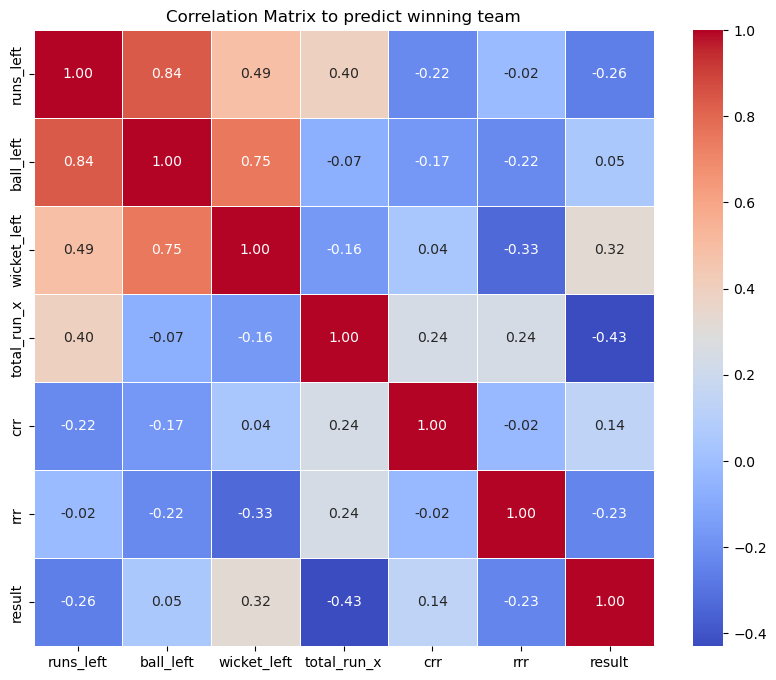

In [80]:
corr_matrix = final_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix to predict winning team')
plt.show()

<!-- Splitting data into train and test sets -->

In [81]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [82]:
x.head()

,BattingTeam,BowlingTeam,City,runs_left,ball_left,wicket_left,total_run_x,crr,rrr
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,131,0.0,6.605042
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,131,0.0,6.661017
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,131,2.0,6.666667
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,131,1.5,6.724138
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,131,1.2,6.782609


In [83]:
y

120       1
121       1
122       1
123       1
124       1
         ..
205076    0
205077    0
205078    0
205079    0
205080    0
Name: result, Length: 92581, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)
x_train.shape,x_test.shape

((74064, 9), (18517, 9))

In [85]:
x_train

,BattingTeam,BowlingTeam,City,runs_left,ball_left,wicket_left,total_run_x,crr,rrr
83309,Sunrisers Hyderabad,Sunrisers Hyderabad,Kolkata,154,103,10,173,6.705882,8.970874
166709,Delhi Daredevils,Delhi Capitals,Mumbai,112,81,9,184,11.076923,8.296296
50939,Rajasthan Royals,Kolkata Knight Riders,Kolkata,121,86,9,176,9.705882,8.441860
70458,Delhi Daredevils,Delhi Capitals,Delhi,102,89,8,144,8.129032,6.876404
141806,Chennai Super Kings,Kolkata Knight Riders,Kolkata,37,26,7,159,7.787234,8.538462
...,...,...,...,...,...,...,...,...,...
108352,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,-5,16,8,167,9.923077,-1.875000
75486,Chennai Super Kings,Mumbai Indians,Mumbai,13,8,2,166,8.196429,9.750000
197690,Deccan Chargers,Sunrisers Hyderabad,Hyderabad,164,91,9,205,8.482759,10.813187
58658,Rajasthan Royals,Rajasthan Royals,Chennai,161,100,7,176,4.500000,9.660000


In [86]:
y_train

83309     0
166709    0
50939     1
70458     0
141806    1
         ..
108352    1
75486     1
197690    0
58658     0
86634     1
Name: result, Length: 74064, dtype: int64

In [87]:
x_test

,BattingTeam,BowlingTeam,City,runs_left,ball_left,wicket_left,total_run_x,crr,rrr
58443,Royal Challengers Bangalore,Royal Challengers Bangalore,Hyderabad,192,66,4,232,4.444444,17.454545
171312,Chennai Super Kings,Royal Challengers Bangalore,Chennai,124,102,10,162,12.666667,7.294118
14697,Kolkata Knight Riders,Mumbai Indians,Pune,105,68,8,162,6.576923,9.264706
183088,Delhi Daredevils,Delhi Capitals,Johannesburg,30,36,7,124,6.714286,5.000000
147620,Kings XI Punjab,Mumbai Indians,Mumbai,44,26,7,164,7.659574,10.153846
...,...,...,...,...,...,...,...,...,...
163677,Mumbai Indians,Mumbai Indians,Mumbai,107,56,9,169,5.812500,11.464286
155818,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,58,61,9,147,9.050847,5.704918
80241,Kings XI Punjab,Kings XI Punjab,Chandigarh,156,87,7,208,9.454545,10.758621
90715,Sunrisers Hyderabad,Gujarat Titans,Hyderabad,22,20,6,127,6.300000,6.600000


In [88]:
y_test

58443     0
171312    1
14697     1
183088    1
147620    1
         ..
163677    0
155818    1
80241     0
90715     1
119409    1
Name: result, Length: 18517, dtype: int64

In [89]:
x_train.columns

Index(['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'ball_left',
       'wicket_left', 'total_run_x', 'crr', 'rrr'],
      dtype='object')

In [90]:
#BattingTeam, BowlingTeam, and City are categorical columns
#they will be converted into numerical form 
cf=ColumnTransformer(transformers=[
    ('cf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])],
                     remainder='passthrough')

In [91]:
#Creating the pipeline
pipe = Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])
#fitting the training data
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [92]:
y_pred=pipe.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8194631959820705


In [93]:
pipe.predict_proba(x_test)[12]

array([0.68873992, 0.31126008])